In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:

How many different dinosaur names are present in the data?
Which was the largest dinosaur? What about missing data in the dataset?
What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
Use the AI assitant to create an interactive map showing each record.
Any other insights you found during your analysis?

In [2]:
df = pd.read_csv('dinasaurs.csv')
df.head()

occurrence_no               name         diet            type  length_m  \
0         130294  Protarchaeopteryx   omnivorous  small theropod       2.0   
1         130295        Caudipteryx   omnivorous  small theropod       1.0   
2         139242        Gorgosaurus  carnivorous  large theropod       8.6   
3         139250        Gorgosaurus  carnivorous  large theropod       8.6   
4         139252        Gorgosaurus  carnivorous  large theropod       8.6   

   max_ma  min_ma    region         lng        lat       class  \
0   130.0  122.46  Liaoning  120.733330  41.799999  Saurischia   
1   130.0  122.46  Liaoning  120.733330  41.799999  Saurischia   
2    83.5   70.60   Alberta -111.528732  50.740726  Saurischia   
3    83.5   70.60   Alberta -111.549347  50.737015  Saurischia   
4    83.5   70.60   Alberta -111.564636  50.723866  Saurischia   

              family  
0  Archaeopterygidae  
1    Caudipterygidae  
2    Tyrannosauridae  
3    Tyrannosauridae  
4    Tyrannosauridae

In [3]:
# ist method of dealing with missing data
null_cols = df.isnull().sum()

null_cols[null_cols > 0]

diet        1355
type        1355
length_m    1383
region        42
family      1457
dtype: int64

In [4]:
null_cols.diet

1355

In [5]:
null_cols.diet.dtype

dtype('int64')

In [6]:
string_columns = df.select_dtypes(include=['object']).columns
df[string_columns]= df[string_columns].fillna(df[string_columns].mode().iloc[0])        #.iloc[0])


In [7]:
df[string_columns]

name         diet              type             region  \
0     Protarchaeopteryx   omnivorous    small theropod           Liaoning   
1           Caudipteryx   omnivorous    small theropod           Liaoning   
2           Gorgosaurus  carnivorous    large theropod            Alberta   
3           Gorgosaurus  carnivorous    large theropod            Alberta   
4           Gorgosaurus  carnivorous    large theropod            Alberta   
...                 ...          ...               ...                ...   
4946      Isaberrysaura  herbivorous        ornithopod            Neuquén   
4947        Stegosaurus  herbivorous  armored dinosaur            Wyoming   
4948     Othnielosaurus  herbivorous        ornithopod            Wyoming   
4949          Iguanodon  herbivorous        ornithopod      Niedersachsen   
4950         Luluichnus  herbivorous        ornithopod  Western Australia   

             class             family  
0       Saurischia  Archaeopterygidae  
1       Saurischia    Caudipterygidae  
2       Saurischia    Tyrannosauridae  
3       Saurischia    Tyrannosauridae  
4       Saurischia    Tyrannosauridae  
...            ...                ...  
4946  Ornithischia    Dromaeosauridae  
4947  Ornithischia      Stegosauridae  
4948  Ornithischia    Dromaeosauridae  
4949  Ornithischia    Dromaeosauridae  
4950  Ornithischia    Dromaeosauridae  

[4951 rows x 6 columns]

In [8]:
print(df)

      occurrence_no               name         diet              type  \
0            130294  Protarchaeopteryx   omnivorous    small theropod   
1            130295        Caudipteryx   omnivorous    small theropod   
2            139242        Gorgosaurus  carnivorous    large theropod   
3            139250        Gorgosaurus  carnivorous    large theropod   
4            139252        Gorgosaurus  carnivorous    large theropod   
...             ...                ...          ...               ...   
4946        1360627      Isaberrysaura  herbivorous        ornithopod   
4947        1363632        Stegosaurus  herbivorous  armored dinosaur   
4948        1363633     Othnielosaurus  herbivorous        ornithopod   
4949        1364695          Iguanodon  herbivorous        ornithopod   
4950        1365108         Luluichnus  herbivorous        ornithopod   

      length_m  max_ma  min_ma             region         lng        lat  \
0          2.0   130.0  122.46           Liaoni

In [9]:
df.isnull().sum()

occurrence_no       0
name                0
diet                0
type                0
length_m         1383
max_ma              0
min_ma              0
region              0
lng                 0
lat                 0
class               0
family              0
dtype: int64

In [10]:
# To insert the mean value of each column into its missing rows:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

# For median:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)

print(df)

      occurrence_no               name         diet              type  \
0            130294  Protarchaeopteryx   omnivorous    small theropod   
1            130295        Caudipteryx   omnivorous    small theropod   
2            139242        Gorgosaurus  carnivorous    large theropod   
3            139250        Gorgosaurus  carnivorous    large theropod   
4            139252        Gorgosaurus  carnivorous    large theropod   
...             ...                ...          ...               ...   
4946        1360627      Isaberrysaura  herbivorous        ornithopod   
4947        1363632        Stegosaurus  herbivorous  armored dinosaur   
4948        1363633     Othnielosaurus  herbivorous        ornithopod   
4949        1364695          Iguanodon  herbivorous        ornithopod   
4950        1365108         Luluichnus  herbivorous        ornithopod   

      length_m  max_ma  min_ma             region         lng        lat  \
0          2.0   130.0  122.46           Liaoni

In [11]:
df.isnull().sum()

occurrence_no    0
name             0
diet             0
type             0
length_m         0
max_ma           0
min_ma           0
region           0
lng              0
lat              0
class            0
family           0
dtype: int64

In [12]:
din_name = df['name'].value_counts().sort_values(ascending=False)

In [13]:
din_name

Richardoestesia      151
Saurornitholestes    136
Triceratops          125
Iguanodon            111
Troodon              111
                    ... 
Gargoyleosaurus        1
Dakotadon              1
Lapampasaurus          1
Zhuchengceratops       1
Luluichnus             1
Name: name, Length: 1042, dtype: int64

In [14]:
#The largest dinasaurs name is thus:
print('the larget dinasaurs name is:{}'.format(din_name.idxmax()))

the larget dinasaurs name is:Richardoestesia


In [15]:
# the most occuring dinasaur type
din_mode = df.type.value_counts()
print('the most occured dinasaur type is : {}'.format(din_mode.idxmax()))

the most occured dinasaur type is : ornithopod


In [16]:
din_mode

ornithopod          2166
large theropod       733
small theropod       717
sauropod             665
ceratopsian          363
armored dinosaur     307
Name: type, dtype: int64

Text(0.5, 1.0, 'Display of dinasaur type')

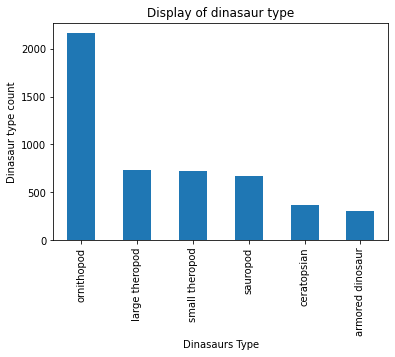

In [17]:
din_mode.plot.bar()
plt.xlabel('Dinasaurs Type')
plt.ylabel('Dinasaur type count')
plt.title('Display of dinasaur type')

In [18]:
df.isnull().mean()*100

occurrence_no    0.0
name             0.0
diet             0.0
type             0.0
length_m         0.0
max_ma           0.0
min_ma           0.0
region           0.0
lng              0.0
lat              0.0
class            0.0
family           0.0
dtype: float64

In [19]:
df_g = df.groupby('type').count()

In [20]:
df_g

occurrence_no  name  diet  length_m  max_ma  min_ma  region  \
type                                                                            
armored dinosaur            307   307   307       307     307     307     307   
ceratopsian                 363   363   363       363     363     363     363   
large theropod              733   733   733       733     733     733     733   
ornithopod                 2166  2166  2166      2166    2166    2166    2166   
sauropod                    665   665   665       665     665     665     665   
small theropod              717   717   717       717     717     717     717   

                   lng   lat  class  family  
type                                         
armored dinosaur   307   307    307     307  
ceratopsian        363   363    363     363  
large theropod     733   733    733     733  
ornithopod        2166  2166   2166    2166  
sauropod           665   665    665     665  
small theropod     717   717    717     717

In [21]:
df_g.iloc[:,1]

type
armored dinosaur     307
ceratopsian          363
large theropod       733
ornithopod          2166
sauropod             665
small theropod       717
Name: name, dtype: int64

In [22]:
df

occurrence_no               name         diet              type  \
0            130294  Protarchaeopteryx   omnivorous    small theropod   
1            130295        Caudipteryx   omnivorous    small theropod   
2            139242        Gorgosaurus  carnivorous    large theropod   
3            139250        Gorgosaurus  carnivorous    large theropod   
4            139252        Gorgosaurus  carnivorous    large theropod   
...             ...                ...          ...               ...   
4946        1360627      Isaberrysaura  herbivorous        ornithopod   
4947        1363632        Stegosaurus  herbivorous  armored dinosaur   
4948        1363633     Othnielosaurus  herbivorous        ornithopod   
4949        1364695          Iguanodon  herbivorous        ornithopod   
4950        1365108         Luluichnus  herbivorous        ornithopod   

      length_m  max_ma  min_ma             region         lng        lat  \
0          2.0   130.0  122.46           Liaoning  120.733330  41.799999   
1          1.0   130.0  122.46           Liaoning  120.733330  41.799999   
2          8.6    83.5   70.60            Alberta -111.528732  50.740726   
3          8.6    83.5   70.60            Alberta -111.549347  50.737015   
4          8.6    83.5   70.60            Alberta -111.564636  50.723866   
...        ...     ...     ...                ...         ...        ...   
4946       8.2   171.6  168.40            Neuquén  -70.263290 -39.205288   
4947       9.0   157.3  152.10            Wyoming -107.816666  44.650002   
4948       8.2   157.3  152.10            Wyoming -107.816666  44.650002   
4949      10.0   145.0  139.80      Niedersachsen    9.959357  52.341167   
4950       8.2   139.8  125.00  Western Australia  122.142029 -17.489502   

             class             family  
0       Saurischia  Archaeopterygidae  
1       Saurischia    Caudipterygidae  
2       Saurischia    Tyrannosauridae  
3       Saurischia    Tyrannosauridae  
4       Saurischia    Tyrannosauridae  
...            ...                ...  
4946  Ornithischia    Dromaeosauridae  
4947  Ornithischia      Stegosauridae  
4948  Ornithischia    Dromaeosauridae  
4949  Ornithischia    Dromaeosauridae  
4950  Ornithischia    Dromaeosauridae  

[4951 rows x 12 columns]

In [23]:
df['age'] = df['max_ma']-df['min_ma']

In [24]:
df

occurrence_no               name         diet              type  \
0            130294  Protarchaeopteryx   omnivorous    small theropod   
1            130295        Caudipteryx   omnivorous    small theropod   
2            139242        Gorgosaurus  carnivorous    large theropod   
3            139250        Gorgosaurus  carnivorous    large theropod   
4            139252        Gorgosaurus  carnivorous    large theropod   
...             ...                ...          ...               ...   
4946        1360627      Isaberrysaura  herbivorous        ornithopod   
4947        1363632        Stegosaurus  herbivorous  armored dinosaur   
4948        1363633     Othnielosaurus  herbivorous        ornithopod   
4949        1364695          Iguanodon  herbivorous        ornithopod   
4950        1365108         Luluichnus  herbivorous        ornithopod   

      length_m  max_ma  min_ma             region         lng        lat  \
0          2.0   130.0  122.46           Liaoning  120.733330  41.799999   
1          1.0   130.0  122.46           Liaoning  120.733330  41.799999   
2          8.6    83.5   70.60            Alberta -111.528732  50.740726   
3          8.6    83.5   70.60            Alberta -111.549347  50.737015   
4          8.6    83.5   70.60            Alberta -111.564636  50.723866   
...        ...     ...     ...                ...         ...        ...   
4946       8.2   171.6  168.40            Neuquén  -70.263290 -39.205288   
4947       9.0   157.3  152.10            Wyoming -107.816666  44.650002   
4948       8.2   157.3  152.10            Wyoming -107.816666  44.650002   
4949      10.0   145.0  139.80      Niedersachsen    9.959357  52.341167   
4950       8.2   139.8  125.00  Western Australia  122.142029 -17.489502   

             class             family    age  
0       Saurischia  Archaeopterygidae   7.54  
1       Saurischia    Caudipterygidae   7.54  
2       Saurischia    Tyrannosauridae  12.90  
3       Saurischia    Tyrannosauridae  12.90  
4       Saurischia    Tyrannosauridae  12.90  
...            ...                ...    ...  
4946  Ornithischia    Dromaeosauridae   3.20  
4947  Ornithischia      Stegosauridae   5.20  
4948  Ornithischia    Dromaeosauridae   5.20  
4949  Ornithischia    Dromaeosauridae   5.20  
4950  Ornithischia    Dromaeosauridae  14.80  

[4951 rows x 13 columns]

<AxesSubplot:xlabel='age', ylabel='length_m'>

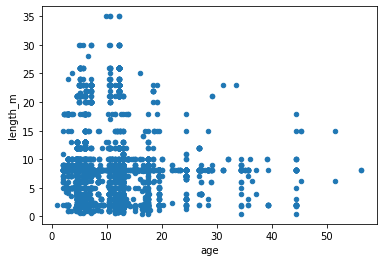

In [25]:
df.plot(x='age',y='length_m',kind ='scatter')

In [27]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around the mean coordinates
m = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=2)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add points to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=f"{row['name']} ({row['type']})"
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('dinosaur_map.html')

# Display the map in a Jupyter notebook (if folium is compatible)

In [28]:
m

In [29]:
df.columns

Index(['occurrence_no', 'name', 'diet', 'type', 'length_m', 'max_ma', 'min_ma',
       'region', 'lng', 'lat', 'class', 'family', 'age'],
      dtype='object')

In [30]:
# Calculate the average length over time
df['mid_ma'] = (df['max_ma'] + df['min_ma']) / 2

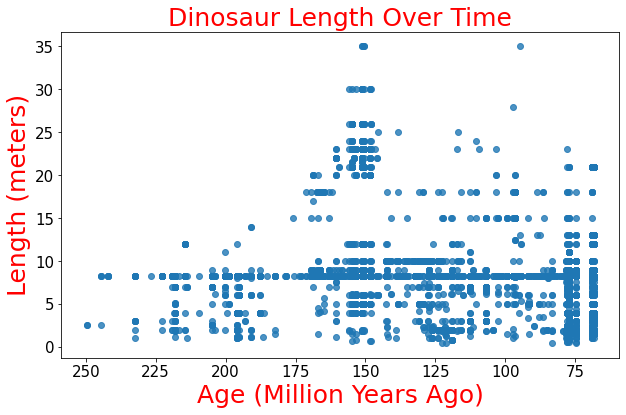

In [31]:
# Plot the relationship between dinosaur length and age
plt.figure(figsize=(10, 6))
plt.scatter(df['mid_ma'], df['length_m'], alpha=0.8)
plt.title('Dinosaur Length Over Time',fontsize=25,color='red')
plt.xlabel('Age (Million Years Ago)',fontsize=25,color='red')
plt.ylabel('Length (meters)',fontsize=25,color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().invert_xaxis()  # Older to newer
plt.show()

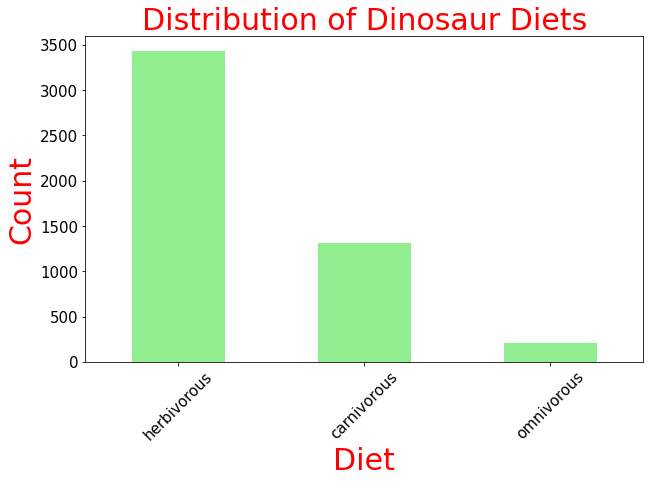

In [32]:
# Plot the distribution of dinosaur diets
diet_counts = df['diet'].value_counts()

plt.figure(figsize=(10, 6))
diet_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Dinosaur Diets',fontsize=30,color='red')
plt.xlabel('Diet',fontsize= 30,color='red')
plt.ylabel('Count',fontsize= 30,color='red')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

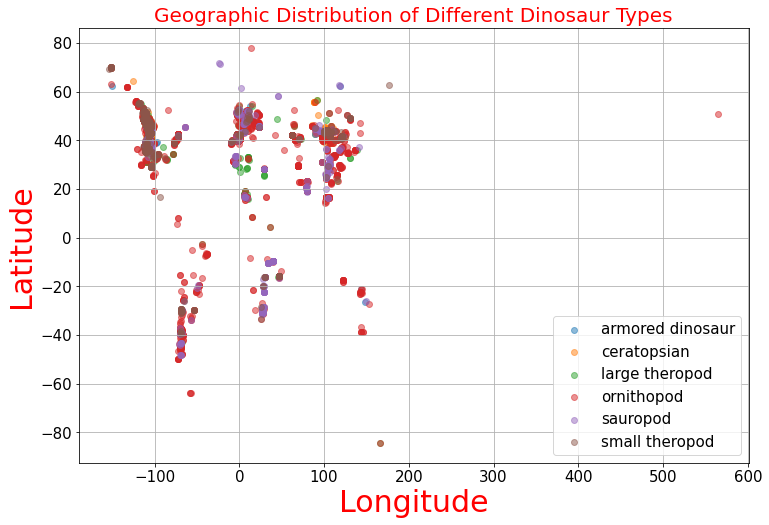

In [33]:
# Plot the geographic distribution of different dinosaur types
plt.figure(figsize=(12, 8))
for dino_type, group in df.groupby('type'):
    plt.scatter(group['lng'], group['lat'], label=dino_type, alpha=0.5)
plt.title('Geographic Distribution of Different Dinosaur Types',fontsize=20,color='red')
plt.xlabel('Longitude',fontsize=30,color='red')
plt.ylabel('Latitude',fontsize=30,color='red')
# plt.xlabel('X-axis', fontsize=14)
# plt.ylabel('Y-axis', fontsize=14)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

The chart indicates that different dinosaur types were distributed across various geographic regions,with significant clustering around certain longitude and latitudes. The equitorial region appears to have a higher concentration of dinosaurs types,signifying a possible preference for warmer climates.

No handles with labels found to put in legend.


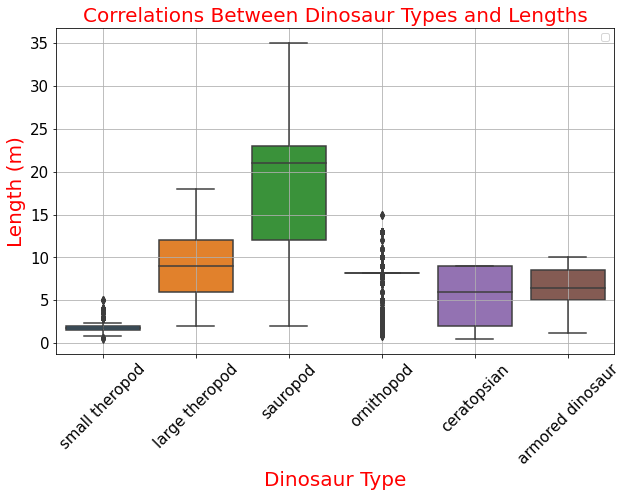

In [34]:
import seaborn as sns

# Plot correlations between dinosaur types and lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='length_m', data=df)
plt.title('Correlations Between Dinosaur Types and Lengths',fontsize=20,color='red')
plt.xlabel('Dinosaur Type',fontsize=20,color='red')
plt.ylabel('Length (m)',fontsize=20,color='red')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

Conclusion:
The chart illustrates that different dinosaur types were distributed across various geographic regions, with significant clustering around certain longitudes and latitudes. The equatorial region appears to have a higher concentration of dinosaur types, indicating a possible preference for warmer climates.

In [ ]:
# # Dinosaur type with the most occurrences
# filter_dinosaurs_counts = filter_dinosaurs['type'].value_counts().reset_index()
# filter_dinosaurs_counts.columns = ['type', 'count']
# import matplotlib.pyplot as plt
# import numpy as np

# # Visualization
# fig, ax = plt.subplots()
# ax.bar(filter_dinosaurs_counts['type'], filter_dinosaurs_counts['count'], color=plt.cm.viridis(np.linspace(0, 1, len(filter_dinosaurs_counts))))
# ax.set_title('Number of Dinosaurs per Type')
# ax.set_xlabel('Dinosaur Type')
# ax.set_ylabel('Number of Dinosaurs')
# plt.xticks(rotation=45)

# plt.show()

# # Calculate dinosaur age  
# filter_dinosaurs['age'] = filter_dinosaurs['max_ma'] - filter_dinosaurs['min_ma']
# filter_dinosaurs['age']
# import seaborn as sns

# sns.regplot(x=filter_dinosaurs['age'], y=filter_dinosaurs['length_m'], ci=False, line_kws={"color":"red"})
# plt.xlabel('Age (years)')
# plt.ylabel('Dinosaur Length')
# plt.title('Dinosaur Length vs. Age')
# plt.show()

# import pandas as pd
# import numpy as np
# import plotly.express as px
# # Create an interactive map
# if 'lat' in filter_dinosaurs.columns and 'lng' in filter_dinosaurs.columns:
#     fig = px.scatter_geo(filter_dinosaurs, lat='lat', lon='lng', hover_name='name', color='region', 
#                          title='Dinosaurs Locations', 
#                          projection='natural earth')
#     fig.show()
# else:
#     print("The dataset does not contain 'lat' and 'lng' columns.")